In [ ]:
from google.colab import files
uploaded = files.upload()  # Manually upload the file

Saving ML_DEG_dataset.csv to ML_DEG_dataset.csv


In [ ]:
from google.colab import files
uploaded = files.upload()  # Manually upload the file

Saving df_merged.csv to df_merged.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("ML_DEG_dataset.csv")

In [ ]:
df_new = pd.read_csv("df_merged.csv")

In [ ]:
df.head()

,geo_accession,target,TUBB,CDT1,LPP,UGP2,MFN2,HIST1H2BD,SEMA3E,RGS5,...,LCAT,MCM5,ASPM,HMGCS2,AGT,CCDC68,CD46,PLCG2,SOX4,NUP107
0,GSM277495,0,1971.4430,35.27089,8473.877,61.36008,878.7402,3212.8910,-16.952740,403.8409,...,79.59111,224.2105,144.5214,18967.55000,143.8013,624.58200,2115.487,1365.6700,426.4089,419.1906
1,GSM277496,1,606.7773,468.34940,5391.271,30.43565,715.1648,323.2217,-8.576768,615.3448,...,94.12312,361.0414,1086.0480,96.36639,235.3114,58.14994,5566.119,303.0632,1563.1800,1017.3650
2,GSM277497,0,8916.9360,82.57671,27863.030,34.52829,1160.9170,778.4032,52.338870,1263.4070,...,217.14050,288.5819,352.1789,11035.48000,115.9880,126.39290,1498.417,810.1133,590.7308,619.0782
3,GSM277498,1,3148.3370,580.13820,5325.731,36.86857,470.3635,328.6313,-10.858900,124.0610,...,47.98767,555.0460,1424.9820,14479.59000,152.0744,172.29320,3903.002,181.3151,1438.3140,1847.4700
4,GSM277499,0,3906.8750,93.08880,20692.270,64.22387,1166.8960,1181.2000,-0.608158,734.8578,...,214.11700,189.5398,141.4275,31952.92000,154.1114,201.99280,2057.749,543.7367,535.5609,462.7539


In [ ]:
count=df['target'].value_counts()
count

,count
target,
1,173
0,172


In [ ]:
labels = ['CRC', 'Normal']
colors = ['Pink', 'skyblue']
explode = [0, 0.1]

In [ ]:
import matplotlib.pyplot as plt

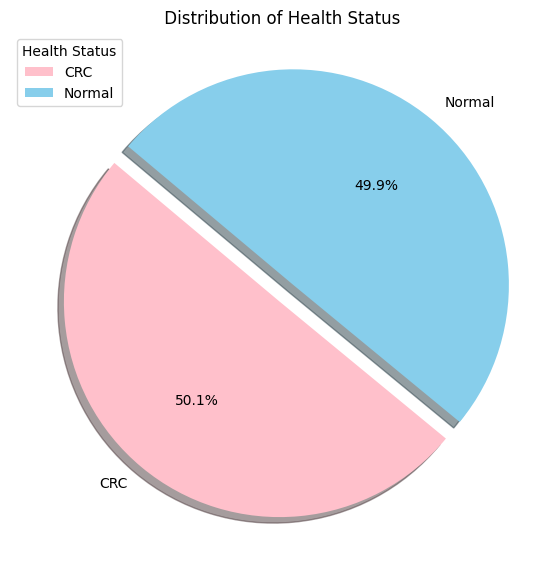

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(count, explode=explode, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=140)

plt.legend(title="Health Status")
plt.title(" Distribution of Health Status")
plt.show()

# Before DEG

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


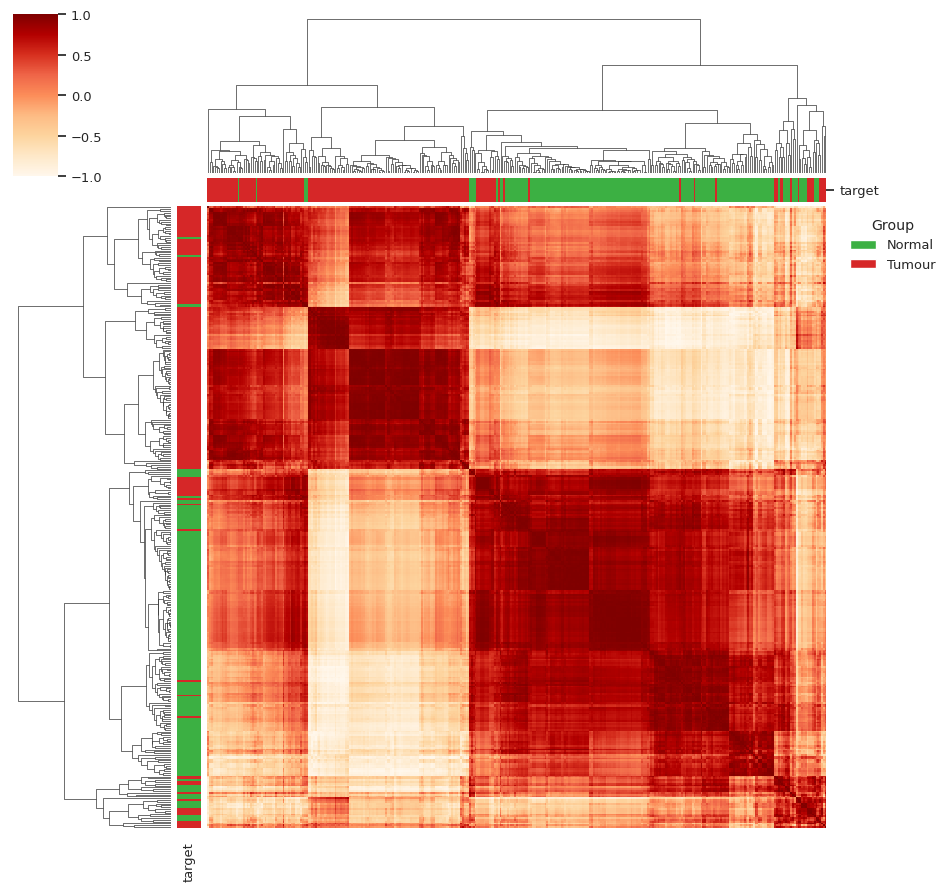

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch   # for the legend handles

# ── 1.  INPUT  ──────────────────────────────────────────────────────────
gene_names = ['ADH1B', 'CDH3', 'GUCA2B', 'PDE9A', 'ABCA8', 'GUCA2A']  # 6 genes
expr_df     = df_new[gene_names]                # expression matrix  (samples × 6 genes)
labels      = df_new['target']                  # 0 = Normal, 1 = Tumour

# ── 2.  SAMPLE‑SAMPLE CORRELATION MATRIX  ──────────────────────────────
corr = expr_df.T.corr()                     # Pearson (diagonal = 1.0)

# ── 3.  DEFINE COLOUR MAPS FOR CLASS  ──────────────────────────────────
group_palette = {0: '#3CB043',   # green  (Normal)
                 1: '#D62728'}   # red    (Tumour)
row_colors = labels.map(group_palette)
col_colors = row_colors  # symmetric matrix ⇒ same colours

# ── 4.  CLUSTERED HEAT‑MAP  ────────────────────────────────────────────
sns.set(font_scale=0.85)
g = sns.clustermap(
        corr,
        cmap='OrRd',          # blue ↔ red, centre = 0
        center=0,
        vmin=-1, vmax=1,          # full correlation range
        row_colors=row_colors,
        col_colors=col_colors,
        linewidths=0,
        figsize=(9, 9)
)


# ── 5.  TIDY UP AXES, TICKS, LEGEND  ───────────────────────────────────

# Hide tick labels (remove sample indices)
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])

# Add small legend for the side bar
handles = [Patch(facecolor=col, label=lab)
           for lab, col in zip(['Normal', 'Tumour'], group_palette.values())]
g.ax_heatmap.legend(handles=handles,
                    title='Group',
                    bbox_to_anchor=(1.02, 1),
                    loc='upper left',
                    frameon=False)

In [ ]:
df_new

,target,EEF1A1,TUBB,TXN,ACTB,PDCD1LG2,RPS28,IPO13,CDT1,LPP,...,EIF5.2,FCHSD2,SOX4,CTDP1,TSSC1,ERCC2,NANS,NUP107,TRPM3.1,SMAD7
0,0,56190.140000,1971.443000,16093.710000,54993.970000,5.684647,31040.540000,223.211600,35.270890,8473.877000,...,1442.851000,500.150800,426.408900,224.524100,325.886800,106.790300,2146.783000,419.190600,8.302612,624.819800
1,1,52176.930000,606.777300,18485.050000,46674.460000,18.281510,30282.590000,221.138700,468.349400,5391.271000,...,1075.820000,466.389500,1563.180000,142.010600,884.826300,163.741600,2197.366000,1017.365000,-7.676422,89.041050
2,0,50483.090000,8916.936000,10451.590000,48284.970000,13.904390,26012.850000,431.434200,82.576710,27863.030000,...,1097.349000,880.909200,590.730800,129.554800,356.198800,123.512600,852.380200,619.078200,4.253619,331.570000
3,1,38690.040000,3148.337000,23610.130000,36091.750000,1.182301,25750.380000,178.728100,580.138200,5325.731000,...,1370.258000,225.323000,1438.314000,158.057600,641.216900,117.641200,1398.114000,1847.470000,-4.145857,222.883100
4,0,54803.840000,3906.875000,11740.430000,62380.230000,18.286430,28069.130000,376.038500,93.088800,20692.270000,...,1063.625000,464.912800,535.560900,271.181000,358.936300,271.933100,2109.570000,462.753900,-9.525824,307.979200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1,14.364780,12.919159,10.882000,14.515623,5.763555,8.559353,9.197060,8.584597,7.700660,...,9.555135,8.099121,11.148784,8.276744,8.872155,7.693846,8.914572,10.308389,5.261822,7.847563
341,0,14.427678,11.577762,11.410396,14.523278,5.758550,8.063018,9.356087,7.154096,8.180040,...,10.333688,8.568023,9.629887,7.837894,7.964916,6.941507,10.331763,10.103915,5.712197,8.546489
342,1,14.487903,11.657293,11.320362,14.474439,6.014672,8.150462,9.255713,7.382137,7.833254,...,10.308634,8.895444,9.565072,7.774305,7.997623,7.237707,10.106137,10.674770,5.796565,7.761888
343,0,14.338725,11.042898,11.125578,14.559524,5.669337,8.475033,9.570283,6.850169,8.090145,...,10.049228,7.824786,8.745649,8.881007,8.391369,7.384013,10.214003,8.809782,5.354088,9.528472


In [ ]:
!pip install pycombat seaborn matplotlib scikit-learn


# BoxPlot